In [80]:
import numpy as np
import os
import pickle
import argparse
import numpy as np
import time
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [81]:
def traffic_sign(aligned=True):
    if aligned:
        return load_traffic('data', kind='aligned')
    return load_traffic('data', kind='unaligned')

In [82]:
def load_traffic(path, kind='train', subclass=None):
    import os
    import gzip
    import numpy as np

    t_file = "./data/train" + "_wb_" + kind +".p"

    """Load traffic data from `path`"""
    with open(t_file, mode='rb') as f:
        train = pickle.load(f)

    images, labels = train['features'], train['labels']
    images = images.reshape((images.shape[0], -1))

    return images, labels

In [83]:
load_data = traffic_sign

In [84]:
def normalize(X, u = None, sd = None):
    u = np.mean(X, axis=0)
    sd = np.std(X, axis=0)
    Xnorm = (X-u)/sd
    
    return Xnorm

In [90]:
class PCA:
    
    def __init__(self, num_components):
        self.num_components = num_components
        self.evals = []
        self.evecs = []
        
    def fit(self, X):
        Xnorm = normalize(X).T
        cov_matrix = np.matmul(Xnorm, Xnorm.T) / len(X) 
        self.evals, self.evecs = np.linalg.eigh(cov_matrix)
        
    def transform(self, X):
        return np.matmul(X, self.evecs[:, -self.num_components:])

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [129]:
pca = PCA(10)

In [130]:
Xpc = pca.fit_transform(X)

In [150]:
X[0,:].shape

(1024,)

In [155]:
Xpc[:,0].shape

(1024,)

In [156]:
newX = np.matmul(X[0, :], Xpc)

In [158]:
newX.shape

(10,)

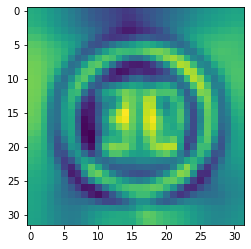

In [131]:
plt.imshow(newX.reshape(32, 32));